## Network analysis hands-on

Good resource to learn basics of Network science: 
- http://networksciencebook.com/chapter/0

Recent summary of Graph Network and their use in ML: 
- [Relational inductive biases, deep learning, and graph networks](https://arxiv.org/abs/1806.01261)

Examples of Network graphs: 
1. [NetworkX Example dataset](https://networkx.org/documentation/networkx-1.9/examples/index.html)
2. [Stanford Large Network Dataset Collection](https://snap.stanford.edu/data/)

Network building and manipulation will be done using `NetworkX` - a python package made for this exact function 

In [2]:
# import modules 
import os 
import numpy as np
import networkx as nx

#----- PLOTTING PARAMS ----# 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%config InlineBackend.figure_format = 'retina'

## 1. Basics 

**Nodes:** Points which are connected to each other. Can represent people, words, or atoms -- objects which have attributes of their own 

**Edges:** Connection between the `nodes` - show how nodes (entities) are connected, bond distance, social network (friendships) -- property which connect the entities 

In [13]:
# Start an empty graph 
G = nx.Graph() 

# Add a node 
G.add_node(42)

# Add node from list of entities 
temp_list = ['A','B','C']
G.add_nodes_from(temp_list)

In [14]:
G.nodes

NodeView((42, 'A', 'B', 'C'))

In [15]:
# Remove nodes 
G.remove_node(42) #This is definite node name and should exist in the network 

# Multiple nodes 
G.remove_nodes_from(['A','Z','Blah']) #Here it is compared to the element to that in the list 

In [16]:
G.nodes

NodeView(('B', 'C'))

In [17]:
# add single edge - tuple of nodes (source, target)
# this also adds nodes if they don't already exist
G.add_edge('C','Z')

In [20]:
print(G.edges, G.nodes)

[('C', 'Z')] ['B', 'C', 'Z']


In [21]:
# add multiple edges (list of tuples) [(source, target), (source, target)]
G.add_edges_from([('B', 'C') , ('B', 'Z')])

In [22]:
G.edges

EdgeView([('B', 'C'), ('B', 'Z'), ('C', 'Z')])

In [25]:
# Like nodes, we can remove multiple edges 
# remove multiple edges (list of tuples)
G.remove_edges_from([('A', 'B') , ('C', 'B')]) #Here list are commutative 

In [26]:
G.edges

EdgeView([('B', 'Z'), ('C', 'Z')])

In [27]:
# get number of nodes in network G
G.number_of_nodes()

3

In [28]:
# get number of edges in network G
G.number_of_edges()

2

In [29]:
# get number of neighbors (connections)
G.degree('B')

1

In [30]:
G.clear()

## 2. Reading from a file 

For example we will look at Facebook dataset installed from SNAP dataset 

In [31]:
# input edgelist from file
G = nx.read_edgelist('./data/facebook_combined.txt')

In [34]:
G.number_of_nodes()

4039

In [35]:
G.number_of_edges()

88234

In [39]:
# get the 2nd node's neighbors (retrieves a dictionary)
dict_neighbors = G.neighbors('2')

In [42]:
G.degree('2')

10

In [41]:
list(dict_neighbors)

['0', '20', '115', '116', '149', '226', '312', '326', '333', '343']

In [44]:
G.clear()

## 3. Type of different networks 

### a. Weighted Graphs

**Edge weight** 
Consider that the edge that you are adding should contain additional information, such as the strength of the connection. This would be important, for example, when analyzing communication networks to check friendship/connectivity strength. You want to capture how many times they exchanged e-mails, calls, text messages, to indicate the strength of the connection. For this you will assign weights to the edge, values that can be the number of communications, or the fraction of communications, normalized.

I had used this type of graph in my analysis for Indian spices. In that case, the edge was assigned a weight corresponding to the number of times a pair of spice occured together in a recipe. 

In [45]:
# assign weight to edge
G.add_edge('Water','Soda', weight=10)

Ways to access edge property: 

In [62]:
G.edges.data()

EdgeDataView([('Water', 'Soda', {'weight': -1})])

In [54]:
G['Soda']['Water']

{'weight': 10}

In [55]:
G['Water']['Soda']

{'weight': 10}

In [56]:
# change edge weight
G['Water']['Soda']['weight'] = -1

In [57]:
G.edges.data()

EdgeDataView([('Water', 'Soda', {'weight': -1})])

### b. Directed Graphs 

**Incorporate directionality in the edge.**
Instead of having just the edge showing the connection: A --- B encode a type of connection. If A is giving (food, resources, atoms, electrons) to B. In that case: A ----> B 

In [82]:
#undirected
G.nodes

NodeView(('Water', 'Soda'))

In [83]:
# you can create a directed representation of network G
dg = nx.to_directed(G)

In [84]:
dg.edges

OutEdgeView([('Water', 'Soda'), ('Soda', 'Water')])

In [81]:
dg.get_edge_data('Water','Soda')

{'weight': 10}

### c. Multigraphs 

`NetworkX` provides classes for graphs which allow multiple edges between any pair of nodes. The `MultiGraph` and `MultiDiGraph` classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs.

In [85]:
# multigraphs can store multiple edges information between same two nodes that can have different properties
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 3.0), (1, 2, 75), (2, 3, 5), (1, 2, 4.2)])

In [86]:
# lists the edges (node1, node2, edge_index), including the multiedges, adding the multiedge index as 3rd element in edge tuple
MG.edges

MultiEdgeView([(1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 3, 0)])

In [87]:
# lists the edges (node1, node2, weight/edge_attribute), the 3rd element is the weights of the edges
MG.edges.data('weight')

MultiEdgeDataView([(1, 2, 3.0), (1, 2, 75), (1, 2, 4.2), (2, 3, 5)])

In [89]:
MG.edges.data()

MultiEdgeDataView([(1, 2, {'weight': 3.0}), (1, 2, {'weight': 75}), (1, 2, {'weight': 4.2}), (2, 3, {'weight': 5})])

In [90]:
# check the weight of an edge
MG[1][2]

AtlasView({0: {'weight': 3.0}, 1: {'weight': 75}, 2: {'weight': 4.2}})

### d. Bipartite 

Bipartite graphs `B = (U, V, E)` have two node sets `U,V` and edges in `E` that _only_ connect nodes from opposite sets. It is common in the literature to use an spatial analogy referring to the two node sets as top and bottom nodes.

In [92]:
from networkx.algorithms import bipartite

In [93]:
bip = nx.Graph()

In [94]:
# add nodes with the node attribute "bipartite", a network of who likes what fruits
bip.add_nodes_from(['apple', 'peach', 'watermelon', 'pear'], bipartite=0)
bip.add_nodes_from(['Alice', 'Steve', 'Mary'], bipartite=1)

In [95]:
bip.add_edges_from([('Alice', 'apple'), ('Alice', 'peach'), ('Steve', 'watermelon'), 
                    ('Mary', 'pear'), ('Mary', 'apple'), ('Mary', 'watermelon')])

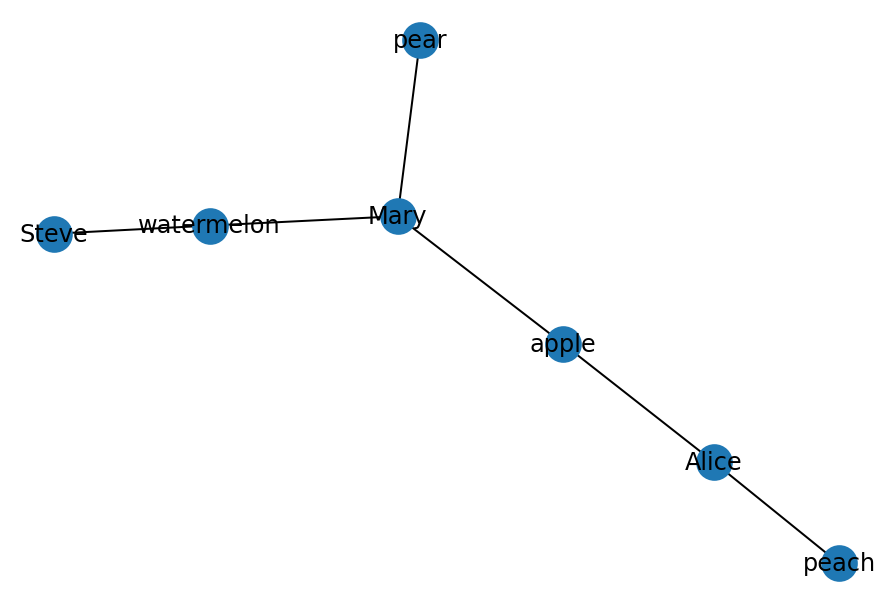

In [96]:
nx.draw(bip, with_labels=True)

Currently, `NetworkX` does not provide a bipartite graph visualization method to visually delimit the two sets of nodes. However, we can draw the left and right set of nodes and see how they connect to each other. Further, you can play around with coloring the nodes based on the 'bipartite' attribute to further refine visually to which node set each node belongs to.

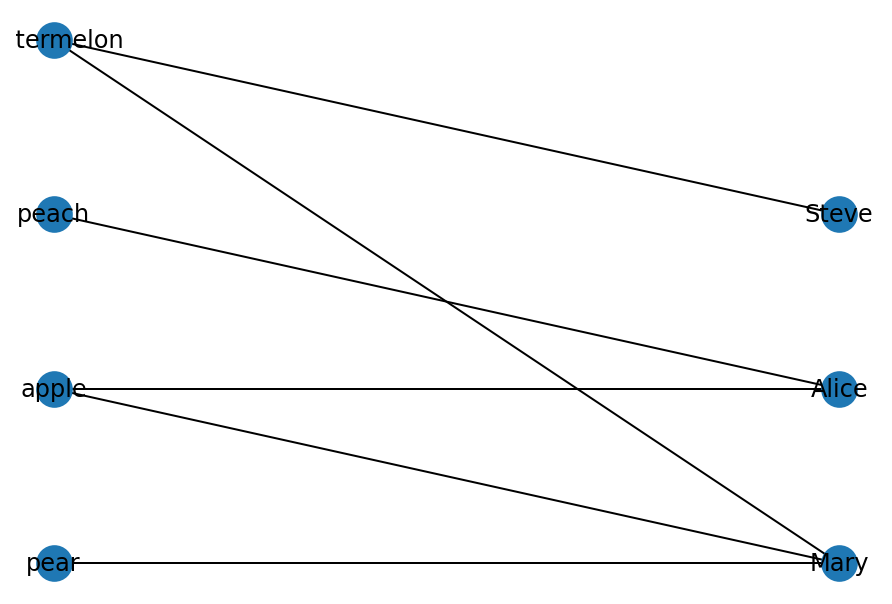

In [101]:
import scipy.sparse as sparse

X, Y = bipartite.sets(bip)
pos = dict()
pos.update((n, (1, i*10)) for i, n in enumerate(X))
pos.update((n, (1.5, i*10)) for i, n in enumerate(Y))

nx.draw(bip, with_labels=True, pos=pos)

Bipartite graphs can be projected as two separate graphs `G1 = (U, E1)` and `G2 = (V, E2)`. The edges will be different though. 

We can create a network of fruits, where nodes will be fruits and the edges will between two fruits will be created if someone likes both fruits. Such, peach and apple will have one edge, as Alice likes both. Same for apple and pear, which are both liked by Mary. Likewise, we can create the second network as the network of individuals, where connections between them will be their preference for the same fruit. Here, we can create a connection/edge between Steve and Mary since both of them like watermelon.

## 3. Network Models

Network models can be very useful for comparing their topology to the structural properties of our network built from real data. Different network models have very distinct structural characteristics, which defines their behavior in case of information flow on the network, attacks/failures on the nodes/edges, etc, and these properties have been extensively studied and are well documented. Knowing to which network model your graph corresponds to can provide valuable insights about its potential behavior under various circumstances.

There are a miriad of network models with different topological properties. Here we will try out some of the most useful ones (that frequently occur in real complex systems).


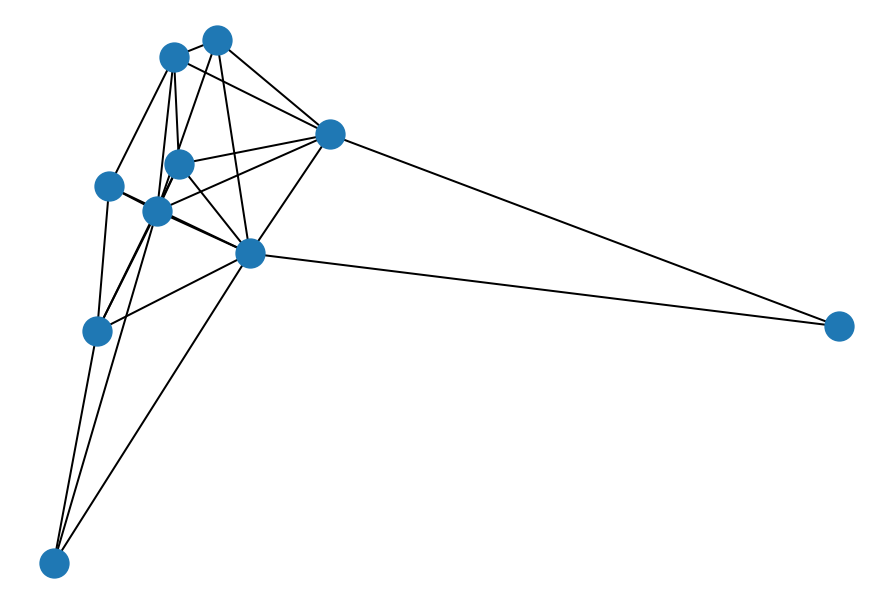

In [109]:
# Barabasi-Albert (scale-free) network 
ba = nx.barabasi_albert_graph(10, 5)
nx.draw_spectral(ba, node_size=200)

[Barabasi-Alber Graph.](https://networkx.org/documentation/latest/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) A graph of N nodes is grown by attaching new nodes each with M edges that are preferentially attached to existing nodes with high degree.

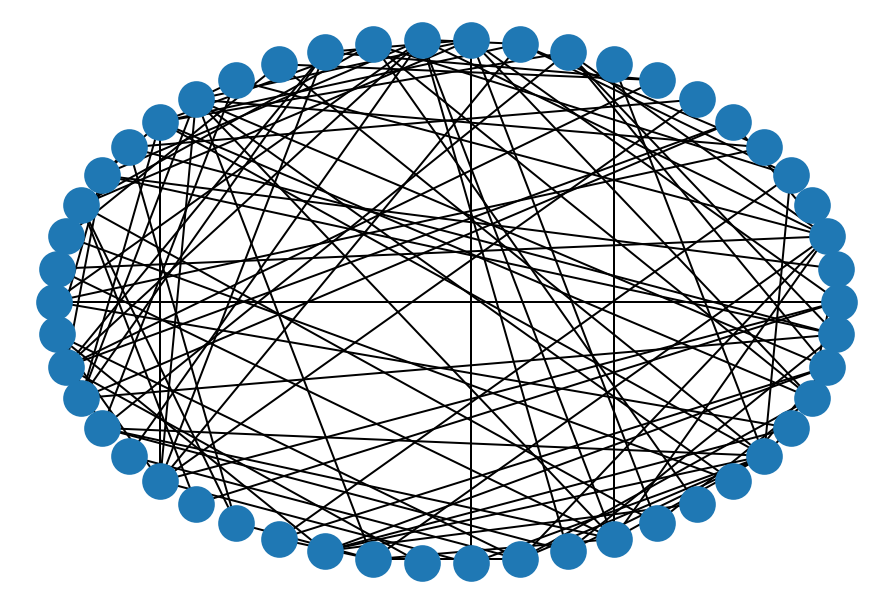

In [110]:
# Erdos-Renyi (random) network 
er = nx.erdos_renyi_graph(50, 0.1)
nx.draw_circular(er)

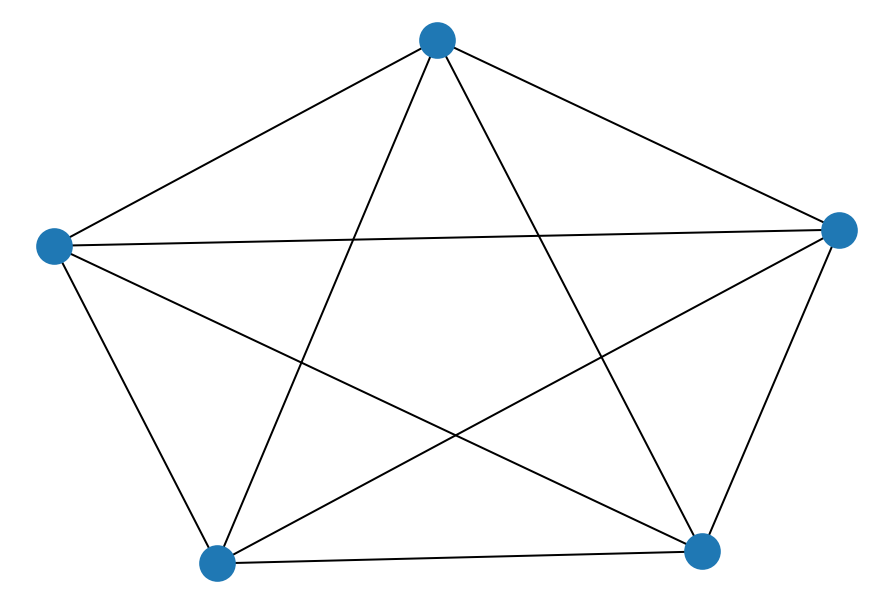

In [113]:
# complete graph (every pair of nodes is connected by a unique edge)
complete = nx.complete_graph(5)
nx.draw(complete)